In [1]:
# %% [markdown]

"""
Homework:

The folder '~//data//homework' contains data of Titanic with various features and survivals.

Try to use what you have learnt today to predict whether the passenger shall survive or not.

Evaluate your model.
"""

"\nHomework:\n\nThe folder '~//data//homework' contains data of Titanic with various features and survivals.\n\nTry to use what you have learnt today to predict whether the passenger shall survive or not.\n\nEvaluate your model.\n"

In [2]:
# %%
# 读取数据
import pandas as pd

data = pd.read_csv('..//data//homework//train.csv')
df = data.copy()
df.sample(10)
# df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S


In [3]:
#test
data_test = pd.read_csv('..//data//homework//test.csv')
df_test = data_test.copy()
df_test.sample(10)
# df_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
104,705,0,3,"Hansen, Mr. Henrik Juul",male,26.00,1,0,350025,7.8542,NaN,S
118,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
290,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.7500,NaN,Q
66,667,0,2,"Butler, Mr. Reginald Fenton",male,25.00,0,0,234686,13.0000,NaN,S
85,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.00,1,2,SC/Paris 2123,41.5792,NaN,C
8,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.00,1,2,SC/Paris 2123,41.5792,NaN,C
165,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.00,1,0,13502,77.9583,D11,S
182,783,0,1,"Long, Mr. Milton Clyde",male,29.00,0,0,113501,30.0000,D6,S
116,717,1,1,"Endres, Miss. Caroline Louise",female,38.00,0,0,PC 17757,227.5250,C45,C
155,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [4]:
# %%
# 去除无用特征
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  600 non-null    int64  
 1   Pclass    600 non-null    int64  
 2   Sex       600 non-null    object 
 3   Age       474 non-null    float64
 4   SibSp     600 non-null    int64  
 5   Parch     600 non-null    int64  
 6   Fare      600 non-null    float64
 7   Embarked  599 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 37.6+ KB


In [5]:
#test
df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  291 non-null    int64  
 1   Pclass    291 non-null    int64  
 2   Sex       291 non-null    object 
 3   Age       240 non-null    float64
 4   SibSp     291 non-null    int64  
 5   Parch     291 non-null    int64  
 6   Fare      291 non-null    float64
 7   Embarked  290 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 18.3+ KB


In [6]:
# 平均方法处理空数据age
df.isnull().sum()
df['Age']=df['Age'].fillna(df['Age'].mean())
df.info()
# test
df_test.isnull().sum()
df_test['Age']=df['Age'].fillna(df_test['Age'].mean())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  600 non-null    int64  
 1   Pclass    600 non-null    int64  
 2   Sex       600 non-null    object 
 3   Age       600 non-null    float64
 4   SibSp     600 non-null    int64  
 5   Parch     600 non-null    int64  
 6   Fare      600 non-null    float64
 7   Embarked  599 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 37.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  291 non-null    int64  
 1   Pclass    291 non-null    int64  
 2   Sex       291 non-null    object 
 3   Age       291 non-null    float64
 4   SibSp     291 non-null    int64  
 5   Parch     291 non-null    int64  
 6   Fare      291 non-null

In [7]:
# %%
# 删除空数据Embarked
print('Is there any NaN in the dataset: {}'.format(df.isnull().values.any()))
df.dropna(inplace=True)
print('Is there any NaN in the dataset: {}'.format(df.isnull().values.any()))
df.info()

Is there any NaN in the dataset: True
Is there any NaN in the dataset: False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 599
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  599 non-null    int64  
 1   Pclass    599 non-null    int64  
 2   Sex       599 non-null    object 
 3   Age       599 non-null    float64
 4   SibSp     599 non-null    int64  
 5   Parch     599 non-null    int64  
 6   Fare      599 non-null    float64
 7   Embarked  599 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 42.1+ KB


In [8]:
# test
print('Is there any NaN in the dataset: {}'.format(df_test.isnull().values.any()))
df_test.dropna(inplace=True)
print('Is there any NaN in the dataset: {}'.format(df_test.isnull().values.any()))
df_test.info()

Is there any NaN in the dataset: True
Is there any NaN in the dataset: False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 290
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  290 non-null    int64  
 1   Pclass    290 non-null    int64  
 2   Sex       290 non-null    object 
 3   Age       290 non-null    float64
 4   SibSp     290 non-null    int64  
 5   Parch     290 non-null    int64  
 6   Fare      290 non-null    float64
 7   Embarked  290 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 20.4+ KB


In [9]:
# %%
# 把categorical数据通过one-hot变成数值型数据
# 很简单，比如sex=[male, female]，变成两个特征,sex_male和sex_female，用0, 1表示
df = pd.get_dummies(df)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0000,1,0,7.2500,0,1,0,0,1
1,1,1,38.0000,1,0,71.2833,1,0,1,0,0
2,1,3,26.0000,0,0,7.9250,1,0,0,0,1
3,1,1,35.0000,1,0,53.1000,1,0,0,0,1
4,0,3,35.0000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
595,0,3,36.0000,1,1,24.1500,0,1,0,0,1
596,1,2,29.7827,0,0,33.0000,1,0,0,0,1
597,0,3,49.0000,0,0,0.0000,0,1,0,0,1
598,0,3,29.7827,0,0,7.2250,0,1,1,0,0


In [10]:
#test
df_test = pd.get_dummies(df_test)
df_test

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,2,22.0,2,1,27.0000,1,0,0,0,1
1,0,3,38.0,0,0,7.8958,0,1,0,0,1
2,0,1,26.0,0,0,42.4000,0,1,0,0,1
3,0,3,35.0,0,0,8.0500,0,1,0,0,1
4,1,1,35.0,0,0,26.5500,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
286,0,2,30.0,0,0,13.0000,0,1,0,0,1
287,1,1,22.0,0,0,30.0000,1,0,0,0,1
288,0,3,42.0,1,2,23.4500,1,0,0,0,1
289,1,1,22.0,0,0,30.0000,0,1,1,0,0


In [11]:
# %%
# train-test split
# %%
# build model
# %%
# predict and evaluate

In [12]:
# %%
# 相关系数矩阵
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.291098,-0.074252,-0.039645,0.091611,0.208244,0.558597,-0.558597,0.130215,0.045541,-0.143182
Pclass,-0.291098,1.000000,-0.330982,0.090738,-0.010009,-0.592325,-0.119981,0.119981,-0.274453,0.218396,0.102424
Age,-0.074252,-0.330982,1.000000,-0.259270,-0.238387,0.078141,-0.095387,0.095387,0.079172,-0.023083,-0.054860
SibSp,-0.039645,0.090738,-0.259270,1.000000,0.420338,0.179759,0.092295,-0.092295,-0.065603,-0.016571,0.068095
Parch,0.091611,-0.010009,-0.238387,0.420338,1.000000,0.254801,0.199330,-0.199330,-0.043265,-0.107628,0.106228
Fare,0.208244,-0.592325,0.078141,0.179759,0.254801,1.000000,0.178376,-0.178376,0.280992,-0.120623,-0.170165
Sex_female,0.558597,-0.119981,-0.095387,0.092295,0.199330,0.178376,1.000000,-1.000000,0.084031,0.084324,-0.127235
Sex_male,-0.558597,0.119981,0.095387,-0.092295,-0.199330,-0.178376,-1.000000,1.000000,-0.084031,-0.084324,0.127235
Embarked_C,0.130215,-0.274453,0.079172,-0.065603,-0.043265,0.280992,0.084031,-0.084031,1.000000,-0.155084,-0.779459
Embarked_Q,0.045541,0.218396,-0.023083,-0.016571,-0.107628,-0.120623,0.084324,-0.084324,-0.155084,1.000000,-0.497992


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

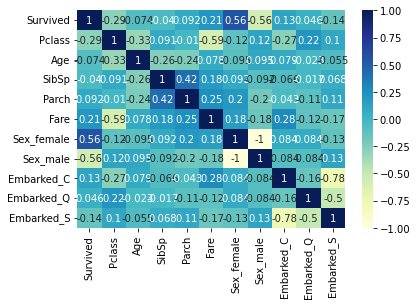

In [13]:
# %%
# 相关系数矩阵可视化
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

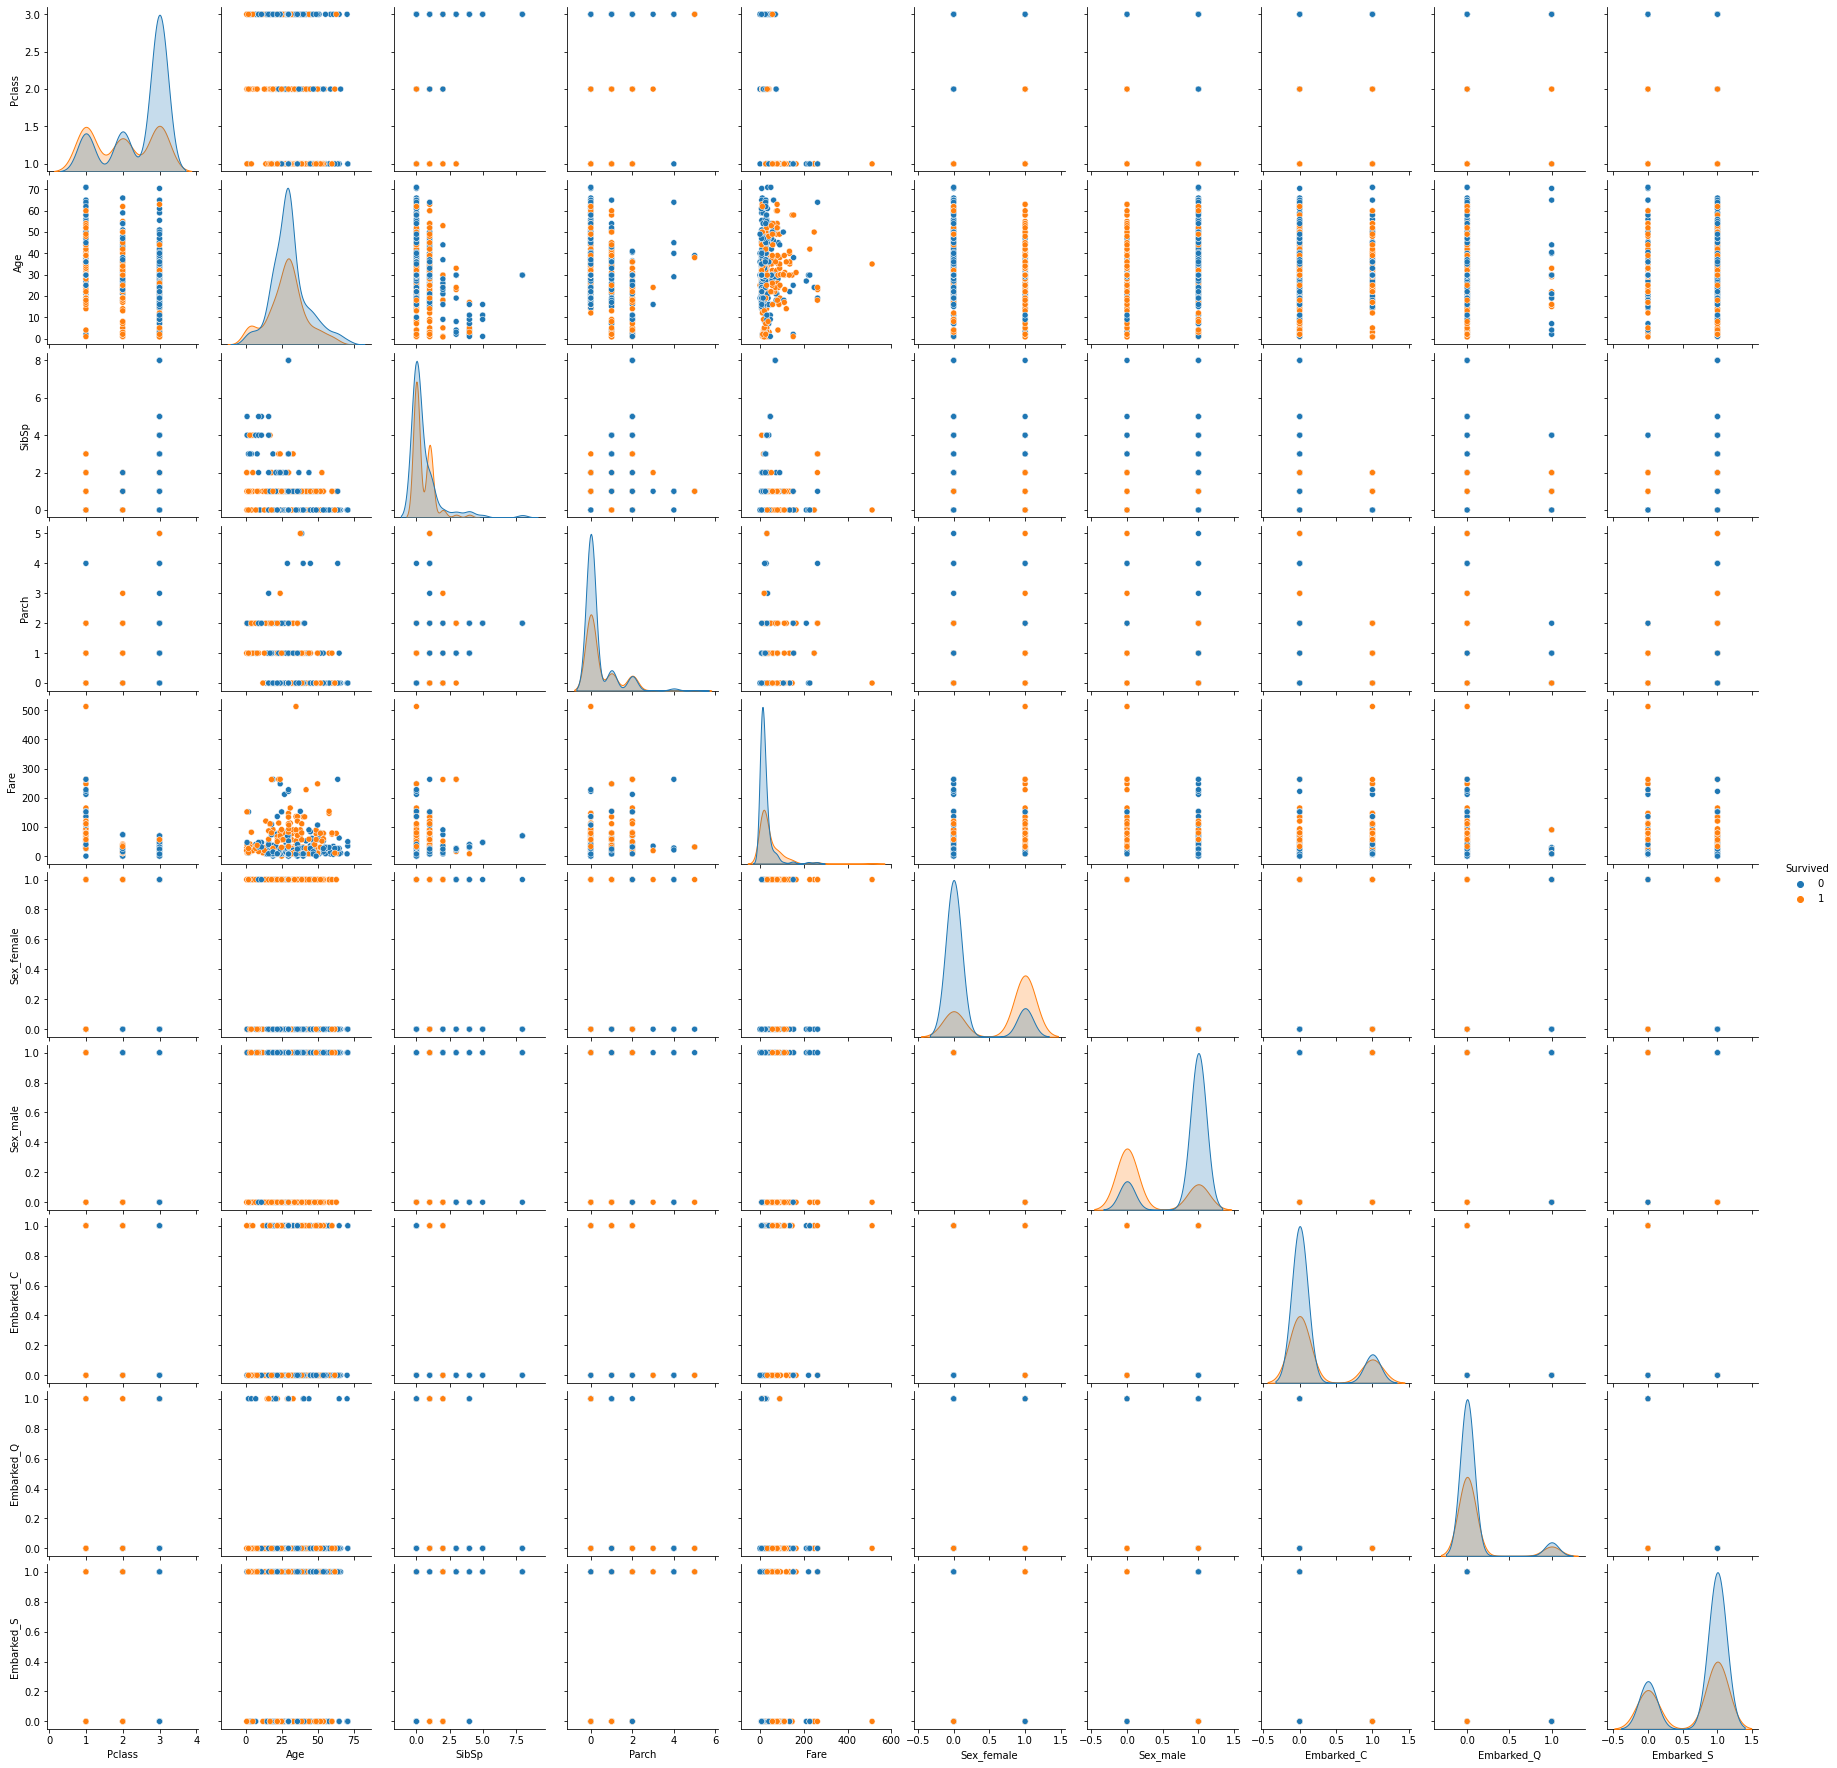

In [14]:
# %%
# correlation plot
sns.pairplot(df, kind='scatter', hue='Survived')

In [15]:
# %%
# 描述数值型数据，其中`.T`表转置
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,599.0,0.392321,0.488676,0.00,0.000,0.0000,1.0,1.0000
Pclass,599.0,2.310518,0.834302,1.00,2.000,3.0000,3.0,3.0000
Age,599.0,29.768982,12.922675,0.75,22.000,29.7827,35.0,71.0000
SibSp,599.0,0.539232,1.097906,0.00,0.000,0.0000,1.0,8.0000
Parch,599.0,0.375626,0.774256,0.00,0.000,0.0000,0.0,5.0000
Fare,599.0,31.765643,46.283044,0.00,7.925,14.5000,30.5,512.3292
Sex_female,599.0,0.370618,0.483374,0.00,0.000,0.0000,1.0,1.0000
Sex_male,599.0,0.629382,0.483374,0.00,0.000,1.0000,1.0,1.0000
Embarked_C,599.0,0.195326,0.396782,0.00,0.000,0.0000,0.0,1.0000
Embarked_Q,599.0,0.090150,0.286636,0.00,0.000,0.0000,0.0,1.0000


In [16]:
# %%
# 回归标签（预测目标）为鱼的重量
# 特征（自变量）为其他数值型特征
y = df['Survived']
X = df.iloc[:, 1:]
# print(df)
# print(df.iloc[:, 1:])

In [17]:
# test
y_test = df_test['Survived']
X_test = df_test.iloc[:, 1:]

In [18]:
# %%
# 分离训练集与测试集并输出其shape
# 直接连接到数据集
import numpy as np
# from sklearn.model_selection import train_test_split
X_train=X
y_train=y
print('X_train: {}'.format(np.shape(X_train)))
print('y_train: {}'.format(np.shape(y_train)))
print('X_test: {}'.format(np.shape(X_test)))
print('y_test: {}'.format(np.shape(y_test)))

X_train: (599, 10)
y_train: (599,)
X_test: (290, 10)
y_test: (290,)


In [19]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X_test),y_test.values.reshape(-1,1))

0.8

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import numpy as np


def model_perf(model, y_true, y_pred, name=None):
    """返回模型分类准确率，tpr，fpr
    """
    if name is not None:
        print('For model {}: \n'.format(name))
    cm = confusion_matrix(y_true, y_pred)
    for i in range(len(model.classes_)):
        # TODO: Add comments
        tp = cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        fn = cm[i, :].sum() - cm[i, i]
        tn = cm.sum() - tp - fp - fn
        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)
        acc = (tp + tn) / cm.sum()
        print('For class {}: \n TPR is {}; \n FPR is {}; \n ACC is {}. \n'
        .format(model.classes_[i], tpr, fpr, acc))
    return None

In [22]:
 model_perf(model, y_test, model.predict(X_test), 0)

For model 0: 

For class 0: 
 TPR is 0.8864864864864865; 
 FPR is 0.3523809523809524; 
 ACC is 0.8. 

For class 1: 
 TPR is 0.6476190476190476; 
 FPR is 0.11351351351351352; 
 ACC is 0.8. 

